In [ ]:
!pip install --upgrade pip
!pip install transformers
!pip install datasets
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 11.2 MB/s eta 0:00:0

# Dataset

In [ ]:
# Emotion detector
from datasets import list_datasets
all_datasets = list_datasets()
print(f"There are total of {len(all_datasets)} in the hub")
print(f"Some example datasets are {all_datasets[:5]}")

There are total of 20674 in the hub
Some example datasets are ['venetis/my-test-dataset', 'venetis/amazon-shoe-reviews', 'venetis/customer_support_sentiment_on_twitter', 'venetis/consumer_complaint_kaggle', 'venetis/twitter_us_airlines_kaggle']


In [ ]:
from datasets import load_dataset
emotion_dataset = load_dataset('emotion')
emotion_dataset

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_dataset = emotion_dataset['train']
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_dataset)

16000

In [ ]:
train_dataset[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
train_dataset[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [ ]:
train_dataset.column_names

['text', 'label']

In [ ]:
train_dataset.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
train_dataset.features['label']

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [ ]:
train_dataset.features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train

--2023-02-07 11:27:30--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447555 (437K) [text/plain]
Saving to: ‘sentiment_train’

sentiment_train     100%[===================>] 437.07K  --.-KB/s    in 0.05s   

2023-02-07 11:27:32 (9.09 MB/s) - ‘sentiment_train’ saved [447555/447555]



In [ ]:
# load the dataset
sentiment_train = load_dataset('csv',data_files = "sentiment_train",sep='\t')
sentiment_train

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-0b51d3b6531e4e9f/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'text'],
        num_rows: 6918
    })
})

In [ ]:
import pandas as pd
emotion_dataset.set_format(type='pandas')
df = emotion_dataset['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
emotion_dataset['train'].features['label'].int2str(0)

'sadness'

In [ ]:
emotion_dataset['train'].features['label'].int2str(1)

'joy'

In [ ]:
def label_to_str(row):
  return emotion_dataset['train'].features['label'].int2str(row)

df['labels_name'] = df['label'].apply(label_to_str)
df.head()

,text,label,labels_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


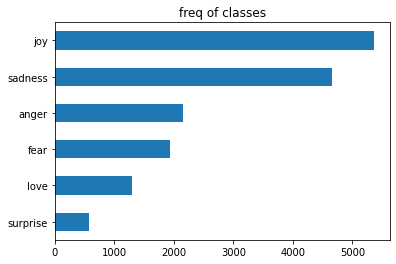

In [ ]:
import matplotlib.pyplot as plt
df['labels_name'].value_counts(ascending=True).plot.barh()
plt.title("freq of classes")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


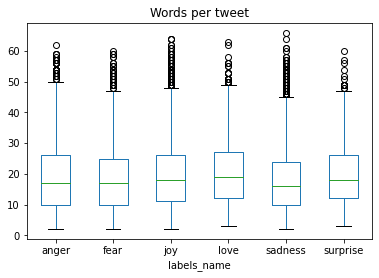

In [ ]:
# Length of the document

df['Words per tweet'] = df['text'].str.split(" ").apply(len)
df.boxplot("Words per tweet", by = 'labels_name', grid=False)
plt.suptitle("")
plt.show()

In [ ]:
emotion_dataset.reset_format()

In [ ]:
# Tokenization - Character tokenization
# Tokenization - Word tokenization
# Goal --> Find a way to effienctly perform the tokenization - Subword Tokenization

In [ ]:
from transformers import AutoTokenizer
model = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model)

In [ ]:
text = "My favorite food is Masala Dosa"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2026, 5440, 2833, 2003, 16137, 7911, 9998, 2050, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
type(encoded_text)

transformers.tokenization_utils_base.BatchEncoding

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'my', 'favorite', 'food', 'is', 'mas', '##ala', 'dos', '##a', '[SEP]']


In [ ]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] my favorite food is masala dosa [SEP]'

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

# Tokenization on Dataset

In [ ]:
# map()
def tokenization(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

tokenization(emotion_dataset['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
emotions_encoded = emotion_dataset.map(tokenization, batched=True, batch_size=None)
emotions_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# Loading the Pretrained Model

In [ ]:
from transformers import TFAutoModel
model_name = 'distilbert-base-uncased'
model = TFAutoModel.from_pretrained(model_name)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
ex_text ='this a test document'
inputs = tokenizer(ex_text, return_tensors='tf')
print(inputs)

{'input_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[ 101, 2023, 1037, 3231, 6254,  102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1]], dtype=int32)>}


In [ ]:
outputs = model(inputs)
outputs

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 6, 768), dtype=float32, numpy=
array([[[-0.24797003, -0.205073  ,  0.00369543, ..., -0.17272142,
          0.17205566,  0.35237196],
        [-0.337583  , -0.24704678,  0.00999891, ..., -0.31198162,
          0.52231586,  0.26820883],
        [-0.21965712,  0.04554196,  0.15866542, ..., -0.3074216 ,
          0.12377816,  0.536172  ],
        [ 0.35309824, -0.33181816,  0.00846234, ..., -0.651656  ,
          0.16531807, -0.41735357],
        [-0.08453424, -0.16688022, -0.07442535, ..., -0.01995332,
          0.11811998, -0.10662867],
        [ 0.80596304,  0.08178014, -0.5555365 , ...,  0.12778507,
         -0.6713768 , -0.2422064 ]]], dtype=float32)>, hidden_states=None, attentions=None)

In [ ]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [ ]:
def extract_hidden_states(batch):
  inputs = {k:v for k,v in batch.items() if k in tokenizer.model_input_names}

  last_hidden_state = model(**inputs).last_hidden_state
  return {'hidden_state':last_hidden_state[:,0]}

In [ ]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
emotions_encoded.set_format('tensorflow', columns=['input_ids','attention_mask','label'])

In [ ]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
emotions_hidden_data = emotions_encoded.map(extract_hidden_states,batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

# Prepare the data with Features Extracted

In [ ]:
import numpy as np
X_train = np.array(emotions_hidden_data['train']['hidden_state'])
X_valid = np.array(emotions_hidden_data['validation']['hidden_state'])
y_train = np.array(emotions_hidden_data['train']['label'])
y_valid = np.array(emotions_hidden_data['validation']['label'])
X_train.shape,X_valid.shape

((16000, 768), (2000, 768))

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c2b1272249f39f60eaa4fed39f08cde28894c447583147e1aa4a8613d8403c50
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=e18531cc38dc58e91a5da57a6e0383e7ed2e7e60ca5a48777358d1d8537764ae
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
df_embed = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_embed["label"] = y_train
df_embed.head()

,X,Y,label
0,4.417753,6.516119,0
1,-2.747640,6.332895,0
2,5.426243,2.934686,3
3,-2.389458,3.995789,2
4,-3.149476,4.196410,3


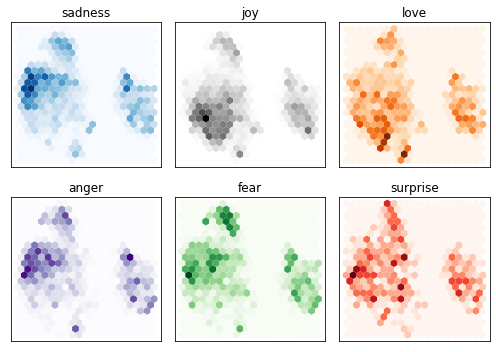

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Blues", "Greys", "Oranges", "Purples", "Greens", "Reds"]
labels = emotion_dataset["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_embed_sub = df_embed.query(f"label == {i}")
    axes[i].hexbin(df_embed_sub["X"], df_embed_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter= 3000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
lr.score(X_valid,y_valid)

0.6335

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_valid,y_valid)

0.352

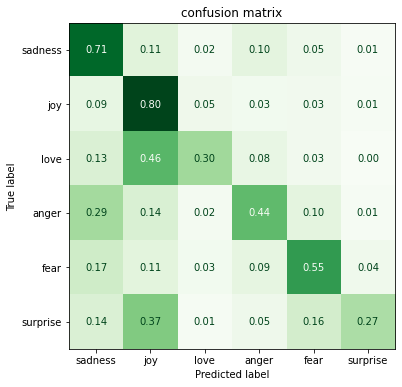

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Greens", values_format=".2f", ax=ax, colorbar=False)
    plt.title("confusion matrix")
    plt.show()
    
y_preds = lr.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

# Approach 2 : Fine Tuning

In [ ]:
from transformers import TFAutoModelForSequenceClassification
num_labels = 6
tf_model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_58']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
emotions_encoded['validation']['label']

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([0, 0, 2, ..., 1, 1, 1])>

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,classification_report

def metrics_compute(pred):
  labels = emotions_encoded['validation']['label']
  predictions = np.argmax(pred,axis=1)
  acc = accuracy_score(labels,predictions)
  cr = classification_report(labels,predictions)
  print(f"accuracy score is {acc}")
  print(f"Classfication report: \n {cr}")

In [ ]:
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded['train'].to_tf_dataset(
    columns = tokenizer_columns, 
    label_cols = ['label'],
    shuffle = True,
    batch_size=128
)

tf_test_dataset = emotions_encoded['validation'].to_tf_dataset(
    columns = tokenizer_columns, 
    label_cols = ['label'],
    shuffle = True,
    batch_size=128
)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:
tf_model.compile(Adam(learning_rate=0.00005), loss = SparseCategoricalCrossentropy(from_logits=True), metrics = SparseCategoricalAccuracy())

In [ ]:
tf_model.fit(tf_train_dataset, validation_data=tf_test_dataset,epochs=2)

Epoch 1/2
125/125 [==============================] - 144s 1s/step - loss: 0.0578 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.1585 - val_sparse_categorical_accuracy: 0.9380
Epoch 2/2
125/125 [==============================] - 133s 1s/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9855 - val_loss: 0.2382 - val_sparse_categorical_accuracy: 0.9365


In [ ]:
pred = tf_model.predict(tf_test_dataset)

16/16 [==============================] - 5s 289ms/step


In [ ]:
np.argmax(pred.logits,axis=1)

array([3, 3, 1, ..., 2, 3, 0])

In [ ]:
eval = tf_model.evaluate(tf_test_dataset)

16/16 [==============================] - 5s 281ms/step - loss: 0.2382 - sparse_categorical_accuracy: 0.9365
